# House Price Predict

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import folium
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
14647,1234000704,20150403T000000,1378000.0,5,3.50,3680,8680,2.0,0,0,...,9,3680,0,2003,0,98033,47.6575,-122.197,2020,8847
15599,619079016,20140602T000000,687000.0,4,3.25,4400,186846,2.0,0,0,...,9,4400,0,1993,0,98022,47.1593,-121.957,2280,186846
3288,1086100100,20140811T000000,476500.0,3,1.00,1060,8625,2.0,0,0,...,7,1060,0,1962,1997,98033,47.6615,-122.179,2010,8901
12929,4321200970,20140610T000000,555000.0,3,2.00,2180,4976,1.5,0,2,...,8,1680,500,1930,0,98126,47.5730,-122.380,1850,5000
14980,8089510170,20141027T000000,935000.0,5,4.50,4230,9701,2.0,0,0,...,10,4230,0,1999,0,98006,47.5444,-122.131,4130,12253


In [4]:
column_names = df.columns

In [5]:
for i in column_names:
    print(i)

id
date
price
bedrooms
bathrooms
sqft_living
sqft_lot
floors
waterfront
view
condition
grade
sqft_above
sqft_basement
yr_built
yr_renovated
zipcode
lat
long
sqft_living15
sqft_lot15


In [19]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

In [8]:
type(evaluation)

pandas.core.frame.DataFrame

In [9]:
def adjustedR2(r2, n, k):
    return r2 - (k - 1)/(n - k)*(1 - r2)

*Training Model*

In [12]:
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 25)

In [13]:
linear_reg_model = linear_model.LinearRegression()
X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1, 1)
Y_train = np.array(train_data['price'], dtype=pd.Series)
linear_reg_model.fit(X_train, Y_train)

LinearRegression()

In [14]:
X_test = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1, 1)
Y_test = np.array(test_data['price'], dtype=pd.Series)

predictions = linear_reg_model.predict(X_test)

In [16]:
rmsesm = float(format(np.sqrt(metrics.mean_squared_error(Y_test, predictions)), '.3f'))
rtrsm = float(format(linear_reg_model.score(X_train, Y_train), '.3f'))
rtesm = float(format(linear_reg_model.score(X_test, Y_test), '.3f'))

cross_validation = float(format(cross_val_score(
    linear_reg_model, df[['sqft_living']],df['price'], cv=5
).mean(), '.3f'))

In [17]:
print('Average Price for test data: {:3f}'.format(Y_test.mean()))
print('Intercept: {}'.format(linear_reg_model.intercept_))
print('Coefficient: {}'.format(linear_reg_model.coef_))

Average Price for test data: 544148.995836
Intercept: -43302.23992546729
Coefficient: [280.00665245]


In [22]:
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cross_validation]
evaluation

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
0,Simple Linear Regression,-,270414.521,0.494,-,0.488,-,0.491


**Plotting results**

In [23]:
sns.set(style="white", font_scale=1)

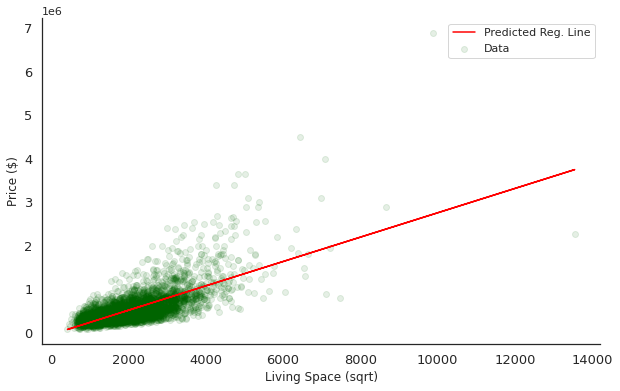

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='darkgreen', label="Data", alpha=.1)
plt.plot(X_test, linear_reg_model.predict(X_test), color="red", label="Predicted Reg. Line")

plt.xlabel("Living Space (sqrt)")
plt.ylabel("Price ($)")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()

plt.gca().spines['right'].set_visible(False) # Sağdaki siyah border'ı kaldırır
plt.gca().spines['top'].set_visible(False) # Yukarıdaki siyah border'ı kaldırır

https://www.kaggle.com/burhanykiyakoglu/predicting-house-prices#-Overview